In [4]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix
import seaborn as sn
from sklearn.metrics import classification_report 

In [5]:
import ssl
ssl._create_default_https_context=ssl._create_unverified_context

In [6]:
(X_train,y_train),(X_text,y_text)=tf.keras.datasets.mnist.load_data()

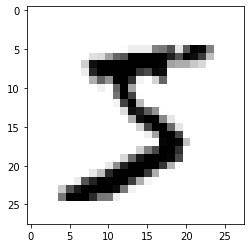

In [7]:
plt.imshow(X_train[0],cmap='binary')

In [8]:
y_train[0]

5

In [14]:
model=tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(64,(3,3),input_shape=(28,28,1),padding="same",activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.Conv2D(64,(3,3),padding="same",activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(1024,(3,3),padding="same",activation='relu'))
model.add(tf.keras.layers.GlobalAveragePooling2D())
model.add(tf.keras.layers.Dense(256,activation='relu'))
model.add(tf.keras.layers.Dense(10,activation="softmax"))

2022-10-14 11:36:01.839227: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-10-14 11:36:01.855424: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-10-14 11:36:01.855569: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (localhost.localdomain): /proc/driver/nvidia/version does not exist
2022-10-14 11:36:01.866526: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        640       
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 64)       256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        36928     
                                                                 
 batch_normalization_1 (Batc  (None, 14, 14, 64)       256       
 hNormalization)                                                 
                                                        

In [17]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["acc"])

In [ ]:
his=model.fit(X_train,y_train,epochs=5,batch_size=64,validation_split=0.2)

Epoch 1/5
750/750 [==============================] - 562s 741ms/step - loss: 0.2335 - acc: 0.9250 - val_loss: 0.1412 - val_acc: 0.9548
Epoch 2/5
192/750 [======>.......................] - ETA: 7:53 - loss: 0.0888 - acc: 0.9716

In [19]:
pre=model.predict(X_text)

313/313 [==============================] - 2s 5ms/step


In [23]:
pred=np.argmax(pre,axis=1)

In [24]:
print(classification_report(y_text,pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       980
           1       0.99      0.98      0.98      1135
           2       0.95      0.98      0.97      1032
           3       0.92      0.97      0.95      1010
           4       0.98      0.97      0.97       982
           5       0.96      0.97      0.96       892
           6       0.96      0.99      0.97       958
           7       0.97      0.97      0.97      1028
           8       0.97      0.94      0.95       974
           9       0.97      0.93      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [29]:
pre_=model.predict(X_train)

1875/1875 [==============================] - 10s 5ms/step


In [30]:
pre_d=np.argmax(pre_,axis=1)

In [31]:
print(classification_report(y_train,pre_d))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      5923
           1       0.99      1.00      0.99      6742
           2       0.99      0.98      0.99      5958
           3       0.98      0.99      0.98      6131
           4       0.99      0.99      0.99      5842
           5       1.00      0.98      0.99      5421
           6       1.00      0.99      0.99      5918
           7       0.99      0.99      0.99      6265
           8       0.96      0.99      0.98      5851
           9       0.99      0.98      0.98      5949

    accuracy                           0.99     60000
   macro avg       0.99      0.99      0.99     60000
weighted avg       0.99      0.99      0.99     60000

